In [1]:
%pylab inline
from solveMDP_richLow import * 
Vgrid = np.load("richLow.npy")
matplotlib.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 15})

Populating the interactive namespace from numpy and matplotlib


100%|██████████| 60/60 [51:08<00:00, 51.14s/it]


### Simulation Part

### Graph and Table

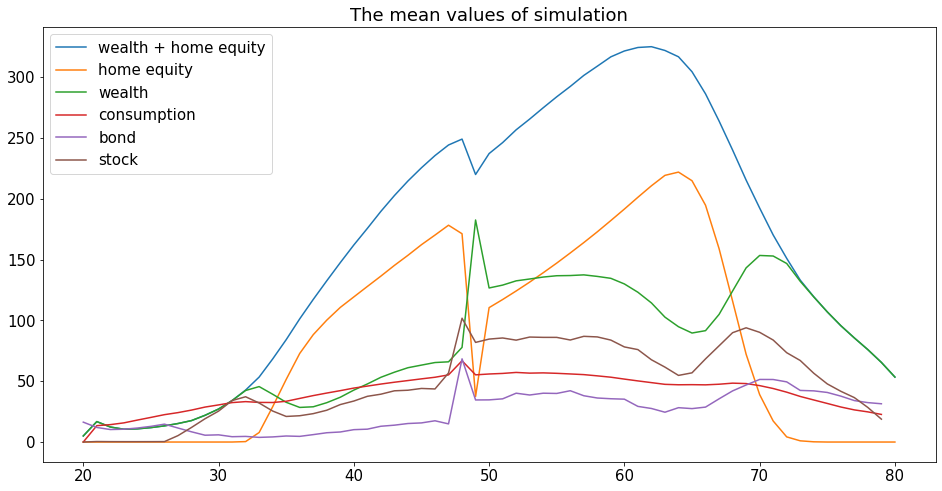

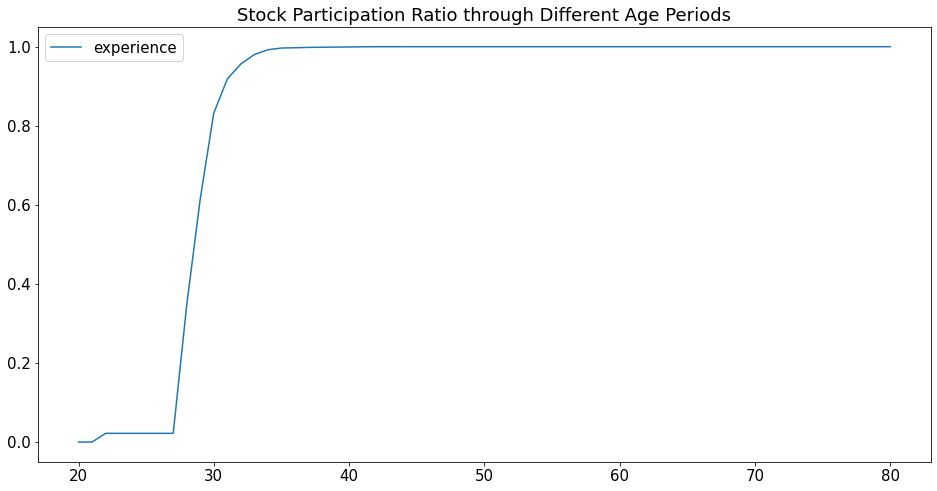

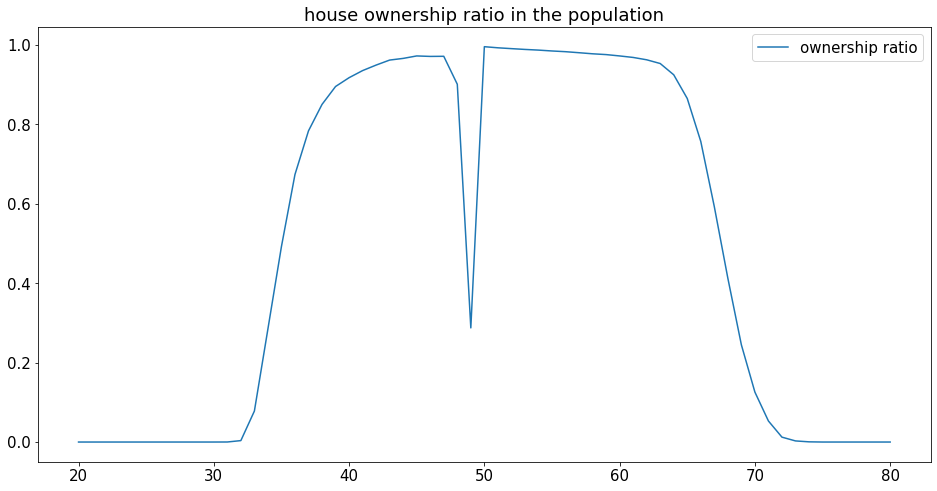

In [4]:
plt.figure(1)
plt.title("The mean values of simulation")
startAge = 20
# value of states, state has one more value, since the terminal state does not have associated action
plt.plot(range(startAge, T_max + startAge + 1),jnp.mean(ws + H*pt*os - ms,axis = 1), label = "wealth + home equity")
plt.plot(range(startAge, T_max + startAge + 1),jnp.mean(H*pt*os - ms,axis = 1), label = "home equity")
plt.plot(range(startAge, T_max + startAge + 1),jnp.mean(ws,axis = 1), label = "wealth")
# value of actions 
plt.plot(range(startAge, T_max + startAge),jnp.mean(cs,axis = 1), label = "consumption")
plt.plot(range(startAge, T_max + startAge),jnp.mean(bs,axis = 1), label = "bond")
plt.plot(range(startAge, T_max + startAge),jnp.mean(ks,axis = 1), label = "stock")
plt.legend()

plt.figure(2)
plt.title("Stock Participation Ratio through Different Age Periods")
plt.plot(range(20, T_max + 21),jnp.mean(zs,axis = 1), label = "experience")
plt.legend()

plt.figure(3)
plt.title("house ownership ratio in the population")
plt.plot(range(startAge, T_max + startAge + 1),(os).mean(axis = 1), label = "ownership ratio")
plt.legend()

In [5]:
# agent buying time collection
agentTime = []
for t in range(30):
    if ((os[t,:] == 0) & (os[t+1,:] == 1)).sum()>0:
        for agentNum in jnp.where((os[t,:] == 0) & (os[t+1,:] == 1))[0]:
            agentTime.append([t, agentNum])
agentTime = jnp.array(agentTime)

# agent hold time collection
agentHold = []
for t in range(30):
    if ((os[t,:] == 0) & (os[t+1,:] == 0)).sum()>0:
        for agentNum in jnp.where((os[t,:] == 0) & (os[t+1,:] == 0))[0]:
            agentHold.append([t, agentNum])
agentHold = jnp.array(agentHold)

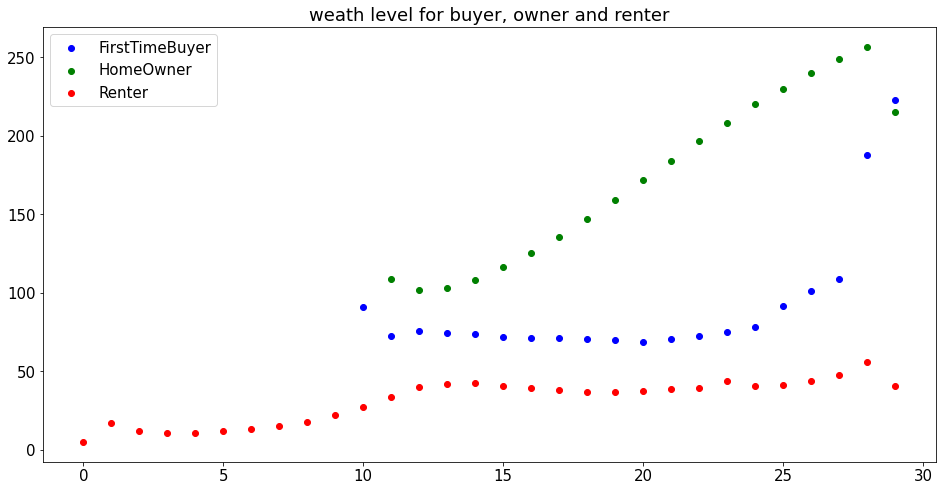

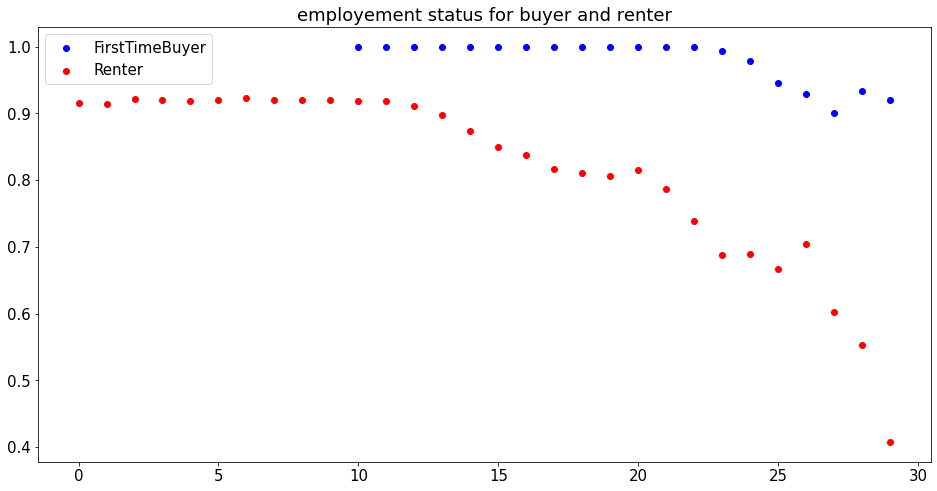

In [6]:
plt.figure(4)
plt.title("weath level for buyer, owner and renter")
www = (os*(ws+H*pt - ms)).sum(axis = 1)/(os).sum(axis = 1)
for age in range(30):
    buyer = agentTime[agentTime[:,0] == age]
    renter = agentHold[agentHold[:,0] == age]
    bp = plt.scatter(age, ws[buyer[:,0], buyer[:,1]].mean(),color =  "b")
    hp = plt.scatter(age, www[age], color = "green")
    rp = plt.scatter(age, ws[renter[:,0], renter[:,1]].mean(),color =  "r")
plt.legend((bp,hp,rp), ("FirstTimeBuyer", "HomeOwner", "Renter"))

plt.figure(5)
plt.title("employement status for buyer and renter")
for age in range(31):
    buyer = agentTime[agentTime[:,0] == age]
    renter = agentHold[agentHold[:,0] == age]
    bp = plt.scatter(age, es[buyer[:,0], buyer[:,1]].mean(),color =  "b")
    rp = plt.scatter(age, es[renter[:,0], renter[:,1]].mean(),color =  "r")
plt.legend((bp, rp), ("FirstTimeBuyer", "Renter"))

In [7]:
# agent participate time collection
agentTimep = []
for t in range(30):
    if ((zs[t,:] == 0) & (zs[t+1,:] == 1)).sum()>0:
        for agentNum in jnp.where((zs[t,:] == 0) & (zs[t+1,:] == 1))[0]:
            agentTimep.append([t, agentNum])
agentTimep = jnp.array(agentTimep)

# agent nonparticipate time collection
agentHoldp = []
for t in range(30):
    if ((zs[t,:] == 0) & (zs[t+1,:] == 0)).sum()>0:
        for agentNum in jnp.where((zs[t,:] == 0) & (zs[t+1,:] == 0))[0]:
            agentHoldp.append([t, agentNum])
agentHoldp = jnp.array(agentHoldp)

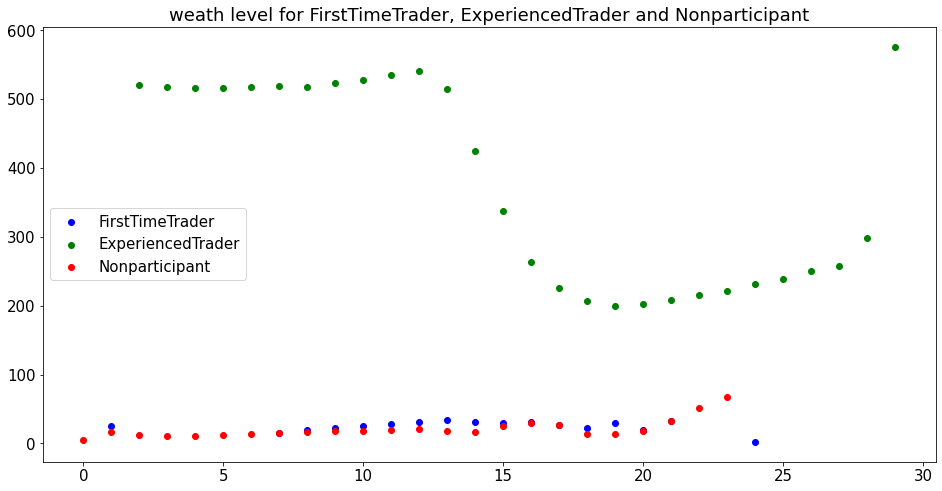

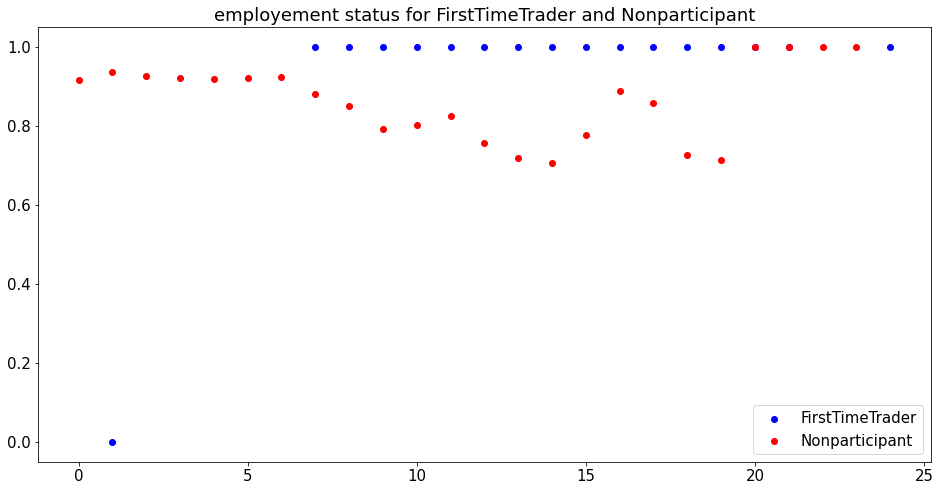

In [8]:
plt.figure(6)
plt.title("weath level for FirstTimeTrader, ExperiencedTrader and Nonparticipant")
www = (zs*(ws+H*pt - ms)).sum(axis = 1)/(zs).sum(axis = 1)
for age in range(30):
    trader = agentTimep[agentTimep[:,0] == age]
    noneTrader = agentHoldp[agentHoldp[:,0] == age]
    tp = plt.scatter(age, ws[trader[:,0], trader[:,1]].mean(),color =  "b")
    ep = plt.scatter(age, www[age], color = "green")
    ip = plt.scatter(age, ws[noneTrader[:,0], noneTrader[:,1]].mean(),color =  "r")
plt.legend((tp,ep,ip), ("FirstTimeTrader", "ExperiencedTrader", "Nonparticipant"))

plt.figure(7)
plt.title("employement status for FirstTimeTrader and Nonparticipant")
for age in range(30):
    trader = agentTimep[agentTimep[:,0] == age]
    noneTrader = agentHoldp[agentHoldp[:,0] == age]
    tp = plt.scatter(age, es[trader[:,0], trader[:,1]].mean(),color =  "b", label = "FirstTimeTrader")
    ip = plt.scatter(age, es[noneTrader[:,0], noneTrader[:,1]].mean(),color =  "r", label = "Nonparticipant")
plt.legend((tp,ip), ("FirstTimeTrader", "Nonparticipant"))

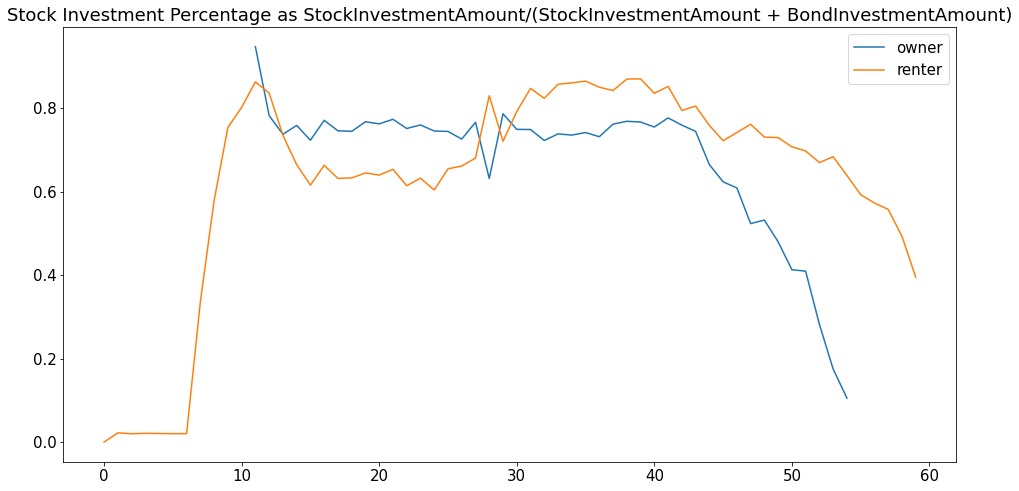

In [9]:
plt.figure(8)
# At every age
plt.title("Stock Investment Percentage as StockInvestmentAmount/(StockInvestmentAmount + BondInvestmentAmount)")
plt.plot((os[:T_max,:]*ks/(ks+bs)).sum(axis = 1)/os[:T_max,:].sum(axis = 1), label = "owner")
plt.plot(((1-os[:T_max,:])*ks/(ks+bs)).sum(axis = 1)/(1-os)[:T_max,:].sum(axis = 1), label = "renter")
plt.legend()

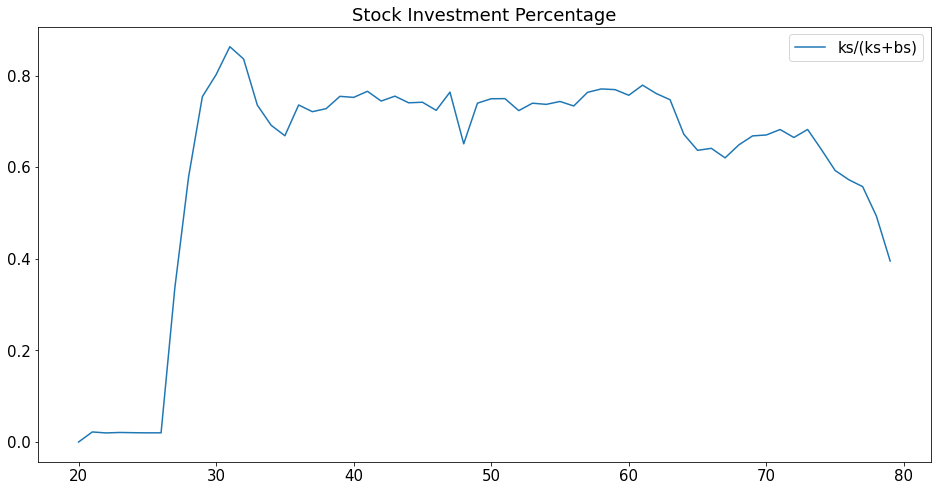

In [10]:
plt.figure(9)
# At every age
plt.title("Stock Investment Percentage")
plt.plot(range(startAge, startAge+T_max), (ks/(ks+bs)).mean(axis = 1), label = "ks/(ks+bs)")
plt.legend()

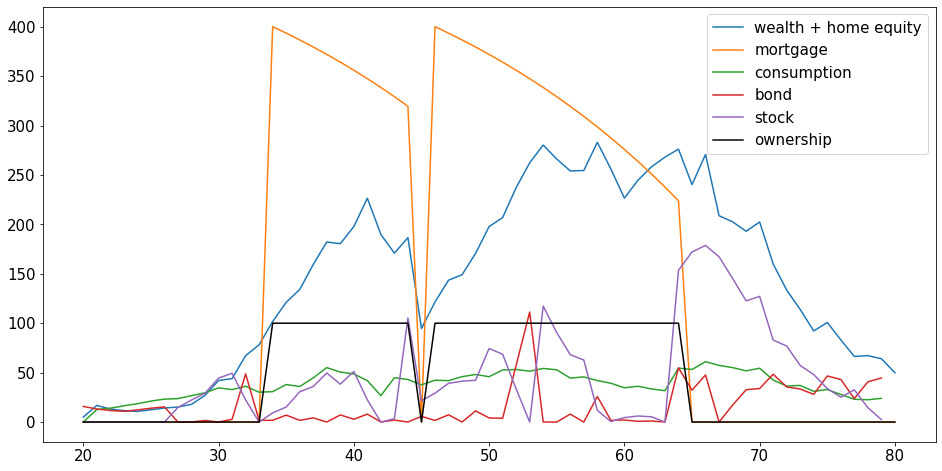

In [32]:
# agent number, x = [w,n,m,s,e,o]
agentNum = randint(num)
plt.plot(range(20, T_max + 21),(ws + os*(H*pt - ms))[:,agentNum], label = "wealth + home equity")
plt.plot(range(20, T_max + 21),ms[:,agentNum], label = "mortgage")
plt.plot(range(20, T_max + 20),cs[:,agentNum], label = "consumption")
plt.plot(range(20, T_max + 20),bs[:,agentNum], label = "bond")
plt.plot(range(20, T_max + 20),ks[:,agentNum], label = "stock")
plt.plot(range(20, T_max + 21),os[:,agentNum]*100, label = "ownership", color = "k")
plt.legend()